<a href="https://colab.research.google.com/github/uteThAn/BaitapAI/blob/main/fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from keras.layers import Flatten

In [ ]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()

In [ ]:
names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat','sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

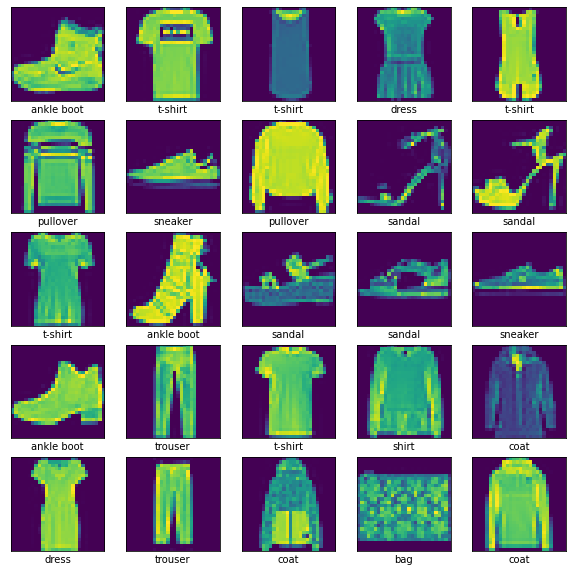

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(names[y_train[i]])
plt.show()

In [ ]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, mode="max",restore_best_weights=True)
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 864,266
Trainable params: 864,266
Non-trai

In [ ]:
#compiling the model...
from keras.backend import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001) #toi uu toc do hoc
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test),callbacks=[callback])

Epoch 1/50
469/469 [==============================] - 9s 18ms/step - loss: 0.6295 - accuracy: 0.7918 - val_loss: 0.4536 - val_accuracy: 0.8352
Epoch 2/50
469/469 [==============================] - 8s 17ms/step - loss: 0.4027 - accuracy: 0.8579 - val_loss: 0.4087 - val_accuracy: 0.8540
Epoch 3/50
469/469 [==============================] - 8s 17ms/step - loss: 0.3579 - accuracy: 0.8729 - val_loss: 0.3985 - val_accuracy: 0.8561
Epoch 4/50
469/469 [==============================] - 8s 17ms/step - loss: 0.3308 - accuracy: 0.8798 - val_loss: 0.3669 - val_accuracy: 0.8681
Epoch 5/50
469/469 [==============================] - 8s 17ms/step - loss: 0.3084 - accuracy: 0.8892 - val_loss: 0.3649 - val_accuracy: 0.8643
Epoch 6/50
469/469 [==============================] - 8s 17ms/step - loss: 0.2922 - accuracy: 0.8935 - val_loss: 0.3436 - val_accuracy: 0.8773
Epoch 7/50
469/469 [==============================] - 8s 17ms/step - loss: 0.2770 - accuracy: 0.8996 - val_loss: 0.3740 - val_accuracy: 0.8625

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

model.save('/content/drive/MyDrive/AI/fashion.h5')

In [ ]:
#model = load_model('/content/drive/MyDrive/AI/fashion.h5')

In [ ]:
#evaluating the model for testing data..
test_loss,test_acc=model.evaluate(x_test,y_test) 

313/313 [==============================] - 1s 3ms/step - loss: 0.3344 - accuracy: 0.8962


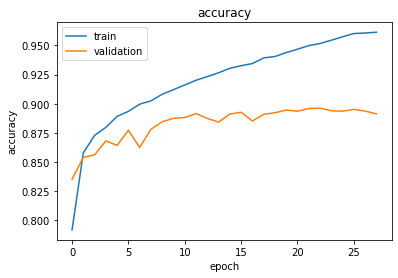

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

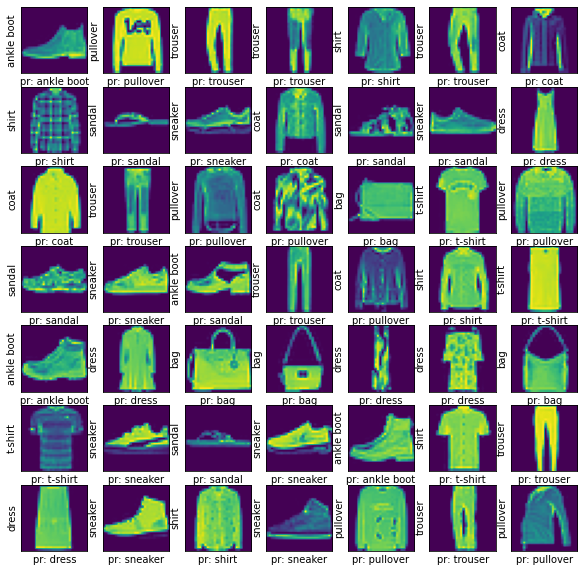

In [ ]:
y_pred = model.predict(x_test)
plt.figure(figsize=(10,10))
for i in range(49):
  plt.subplot(7,7,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x[i])
  plt.xlabel("pr: "+ names[np.argmax(y_pred[i])])
  plt.ylabel( names[y_test[i]])
plt.show()